# Multi Linear Regression

#### Multivariate Linear Regression : Manually

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(0)

In [46]:
x_train=100*torch.randn((500,10))
y_train=100*torch.randn((500,1))

In [47]:
w=torch.zeros((10,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

6. 경사 하강법 구현하기
이제 경사 하강법을 구현합니다. 아래의 'SGD'는 경사 하강법의 일종입니다. lr은 학습률(learning rate)를 의미합니다.
학습 대상인 W와 b가 SGD의 입력이 됩니다.

optimizer = optim.SGD([W, b], lr=0.01)
optimizer.zero_grad()를 실행하므로서 미분을 통해 얻은 기울기를 0으로 초기화합니다. 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있습니다. 그 다음 cost.backward() 함수를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산됩니다. 그 다음 경사 하강법 최적화 함수 opimizer의 .step() 함수를 호출하여 인수로 들어갔던 W와 b에서 리턴되는 변수들의 기울기에 학습률(learining rate) 0.01을 곱하여 빼줌으로서 업데이트합니다.

>gradient를 0으로 초기화

optimizer.zero_grad() 

>비용 함수를 미분하여 gradient 계산

cost.backward() 

>W와 b를 업데이트

optimizer.step() 

In [48]:
# optimizer 설정
optimizer = optim.SGD([w, b], lr=1e-4)

nb_epochs = 50
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(w) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch % 10)==0:
      print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))


Epoch    0/50 hypothesis: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
10%3

1

#### Multivariate Linear Regression : Using Package

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [52]:
torch.manual_seed(0)
x_train=100*torch.randn((500,10))
y_train=100*torch.randn((500,1))

In [54]:
model= nn.Linear(x_train.shape[1],1)

In [55]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.3017,  0.1973,  0.1028, -0.0898,  0.1026,  0.2678,  0.2326,  0.1918,
         -0.1841,  0.0909]], requires_grad=True), Parameter containing:
tensor([0.2373], requires_grad=True)]


In [56]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [58]:
nb_epochs = 20000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/20000 Cost: 8710.957031
Epoch  100/20000 Cost: 8710.931641
Epoch  200/20000 Cost: 8710.907227
Epoch  300/20000 Cost: 8710.880859
Epoch  400/20000 Cost: 8710.855469
Epoch  500/20000 Cost: 8710.829102
Epoch  600/20000 Cost: 8710.801758
Epoch  700/20000 Cost: 8710.777344
Epoch  800/20000 Cost: 8710.750977
Epoch  900/20000 Cost: 8710.725586
Epoch 1000/20000 Cost: 8710.704102
Epoch 1100/20000 Cost: 8710.677734
Epoch 1200/20000 Cost: 8710.650391
Epoch 1300/20000 Cost: 8710.625977
Epoch 1400/20000 Cost: 8710.601562
Epoch 1500/20000 Cost: 8710.579102
Epoch 1600/20000 Cost: 8710.549805
Epoch 1700/20000 Cost: 8710.528320
Epoch 1800/20000 Cost: 8710.500977
Epoch 1900/20000 Cost: 8710.480469
Epoch 2000/20000 Cost: 8710.457031
Epoch 2100/20000 Cost: 8710.430664
Epoch 2200/20000 Cost: 8710.404297
Epoch 2300/20000 Cost: 8710.377930
Epoch 2400/20000 Cost: 8710.356445
Epoch 2500/20000 Cost: 8710.335938
Epoch 2600/20000 Cost: 8710.309570
Epoch 2700/20000 Cost: 8710.289062
Epoch 2800/20000 Cos

완전 발산함 ㄷㄷ

#### 미니배치와 데이터로드

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [3]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [6]:
dataset = TensorDataset(x_train, y_train)
print(dataset.tensors)

(tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]]), tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]]))


In [12]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

2


In [8]:
model = nn.Linear(x_train.shape[1],1) #W의 모양을 따라간다고 생각하면 됨
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [16]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    #print(batch_idx)
    #print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))
  print('-------------------------------------------------------')

Epoch    0/20 Batch 1/3 Cost: 11.236538
Epoch    0/20 Batch 2/3 Cost: 11.624362
Epoch    0/20 Batch 3/3 Cost: 15.153828
-------------------------------------------------------
Epoch    1/20 Batch 1/3 Cost: 0.145667
Epoch    1/20 Batch 2/3 Cost: 18.506157
Epoch    1/20 Batch 3/3 Cost: 18.416874
-------------------------------------------------------
Epoch    2/20 Batch 1/3 Cost: 8.622171
Epoch    2/20 Batch 2/3 Cost: 12.490889
Epoch    2/20 Batch 3/3 Cost: 20.303455
-------------------------------------------------------
Epoch    3/20 Batch 1/3 Cost: 6.579765
Epoch    3/20 Batch 2/3 Cost: 19.629238
Epoch    3/20 Batch 3/3 Cost: 15.816690
-------------------------------------------------------
Epoch    4/20 Batch 1/3 Cost: 14.574165
Epoch    4/20 Batch 2/3 Cost: 7.833930
Epoch    4/20 Batch 3/3 Cost: 14.812562
-------------------------------------------------------
Epoch    5/20 Batch 1/3 Cost: 3.290776
Epoch    5/20 Batch 2/3 Cost: 32.140411
Epoch    5/20 Batch 3/3 Cost: 4.002991
------

In [17]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[155.2438]], grad_fn=<AddmmBackward>)


# Logistic Regression

#### 수작업으로 진행

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [19]:
torch.manual_seed(0)

In [20]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [21]:
W = torch.zeros((x_train.shape[1], 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [22]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b))) # sigmoid 직접 만들기
print(hypothesis) 

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [23]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b) # 이미 구현된 함수 이용하기
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


grad_fn 이 다름

#### 비용 함수(Cost function)


이제 로지스틱 회귀의 가설이 H(x)=sigmoid(Wx+b)인 것은 알았습니다. 이제 최적의 W와 b를 찾을 수 있는 비용 함수(cost function)를 정의해야 합니다. 그런데 혹시 앞서 선형 회귀에서 배운 비용 함수인 평균 제곱 오차(Mean Square Error, MSE)를 로지스틱 회귀의 비용 함수로 그냥 사용하면 안 될까요?

다음은 선형 회귀에서 사용했던 평균 제곱 오차의 수식입니다.

cost(W,b)=1n∑i=1n[y(i)−H(x(i))]2
위의 비용 함수 수식에서 가설은 이제 H(x)=Wx+b가 아니라 H(x)=sigmoid(Wx+b)입니다. 그리고 이 비용 함수를 미분하면 선형 회귀때와 달리 다음과 같이 비볼록(non-convex) 형태의 그래프가 나옵니다.

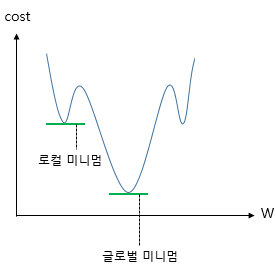


위와 같은 그래프에 경사 하강법을 사용할 경우의 문제점은 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 완전히 최소값이 되는 구간이 아닐 수 있다는 점입니다. 사람이 등산 후에 산을 내려올 때도, 가파른 경사를 내려오다가 넓은 평지가 나오면 순간적으로 다 내려왔다고 착각할 수 있습니다. 하지만 실제로는 그곳이 다 내려온 것이 아니라 잠깐 평지가 나왔을 뿐이라면 길을 더 찾아서 더 내려가야 할 겁니다. 모델도 마찬가지로 실제 오차가 최소가 되는 구간을 찾을 수 있도록 도와주어야 합니다. 만약, 실제 최소가 되는 구간을 잘못 판단하면 최적의 가중치 W가 아닌 다른 값을 택해 모델의 성능이 더 오르지 않습니다.

이를 전체 함수에 걸쳐 최소값인 글로벌 미니멈(Global Minimum)이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)에 도달했다고 합니다. 이는 cost가 최소가 되는 가중치 W를 찾는다는 비용 함수의 목적에 맞지 않습니다.

시그모이드 함수의 특징은 함수의 출력값이 0과 1사이의 값이라는 점입니다. 즉, 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야 하며, 실제값이 0일 때, 예측값이 1에 가까워지면 오차가 커져야 합니다. 그리고 이를 충족하는 함수가 바로 로그 함수입니다. 다음은 y=0.5에 대칭하는 두 개의 로그 함수 그래프입니다.

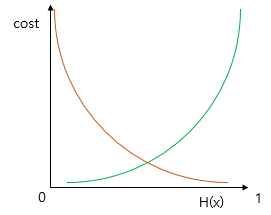

실제값이 1일 때의 그래프를 주황색 선으로 표현하였으며, 실제값이 0일 때의 그래프를 초록색 선으로 표현하였습니다. 실제값이 1이라고 해봅시다. 이 경우, 예측값인 H(x)의 값이 1이면 오차가 0이므로 당연히 cost는 0이 됩니다. 반면, H(x)가 0으로 수렴하면 cost는 무한대로 발산합니다. 실제값이 0인 경우는 그 반대로 이해하면 됩니다. 이 두 개의 로그 함수를 식으로 표현하면 다음과 같습니다.

if y=1→cost(H(x),y)=−log(H(x))
if y=0→cost(H(x),y)=−log(1−H(x))
y의 실제값이 1일 때 −logH(x) 그래프를 사용하고 y의 실제값이 0일 때 −log(1−H(X)) 그래프를 사용해야 합니다.
이는 다음과 같이 하나의 식으로 통합할 수 있습니다.

# cost(H(x),y)=−[ylogH(x)+(1−y)log(1−H(x))]

왜 위 식이 두 개의 식을 통합한 식이라고 볼 수 있을까요? 실제값 y가 1이라고하면 덧셈 기호를 기준으로 우측의 항이 없어집니다. 반대로 실제값 y가 0이라고 하면 덧셈 기호를 기준으로 좌측의 항이 없어집니다. 선형 회귀에서는 모든 오차의 평균을 구해 평균 제곱 오차를 사용했었습니다. 마찬가지로 여기에서도 모든 오차의 평균을 구합니다.

# cost(W)= −1/n * ∑i=1n[y(i)logH(x(i))+(1−y(i))log(1−H(x(i)))]

정리하면, 위 비용 함수는 실제값 y와 예측값 H(x)의 차이가 커지면 cost가 커지고, 실제값 y와 예측값 H(x)의 차이가 작아지면 cost는 작아집니다. 이제 위 비용 함수에 대해서 경사 하강법을 수행하면서 최적의 가중치 W를 찾아갑니다.

W:=W−α∂[cost(W)] / ∂W

In [24]:
# 수작업
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
cost = losses.mean()
print(f'losses:\n{losses}\n cost:\n{cost}')

losses:
tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
 cost:
0.6931471824645996


In [25]:
# 구현된 함수 이용하기
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

#### 학습하기

In [30]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(1,nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

        print()

Epoch  100/1000 Cost: 0.135644
Epoch  100/1000 Cost: 0.135644 Accuracy 100.00%

Epoch  200/1000 Cost: 0.080964
Epoch  200/1000 Cost: 0.080964 Accuracy 100.00%

Epoch  300/1000 Cost: 0.058062
Epoch  300/1000 Cost: 0.058062 Accuracy 100.00%

Epoch  400/1000 Cost: 0.045398
Epoch  400/1000 Cost: 0.045398 Accuracy 100.00%

Epoch  500/1000 Cost: 0.037327
Epoch  500/1000 Cost: 0.037327 Accuracy 100.00%

Epoch  600/1000 Cost: 0.031720
Epoch  600/1000 Cost: 0.031720 Accuracy 100.00%

Epoch  700/1000 Cost: 0.027592
Epoch  700/1000 Cost: 0.027592 Accuracy 100.00%

Epoch  800/1000 Cost: 0.024422
Epoch  800/1000 Cost: 0.024422 Accuracy 100.00%

Epoch  900/1000 Cost: 0.021911
Epoch  900/1000 Cost: 0.021911 Accuracy 100.00%

Epoch 1000/1000 Cost: 0.019871
Epoch 1000/1000 Cost: 0.019871 Accuracy 100.00%



# Softmax Regression

정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배

원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.

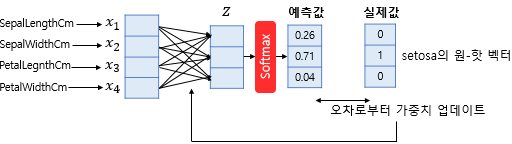

https://wikidocs.net/59427

Cross Entropy 설명

In [35]:
z = torch.rand(3, 5, requires_grad=True)
y = torch.randint(5, (3,)).long() # 총 5가지의 라벨 중 training data가 3개니깐 3 가지 선정
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성

hypothesis = F.softmax(z, dim=1)
print(hypothesis)
print(hypothesis.sum(dim=1))

tensor([[0.1280, 0.2634, 0.2142, 0.2184, 0.1760],
        [0.1955, 0.2749, 0.1584, 0.1760, 0.1952],
        [0.2335, 0.2283, 0.1364, 0.1673, 0.2345]], grad_fn=<SoftmaxBackward>)
tensor([1., 1., 1.], grad_fn=<SumBackward1>)


In [43]:
# High level
print(torch.log(F.softmax(z, dim=1)))
print(F.log_softmax(z, dim=1))
print(torch.log(F.softmax(z, dim=1))==F.log_softmax(z,dim=1))

tensor([[-2.0557, -1.3340, -1.5407, -1.5215, -1.7375],
        [-1.6323, -1.2913, -1.8428, -1.7372, -1.6337],
        [-1.4547, -1.4770, -1.9919, -1.7882, -1.4504]], grad_fn=<LogBackward>)
tensor([[-2.0557, -1.3340, -1.5407, -1.5215, -1.7375],
        [-1.6323, -1.2913, -1.8428, -1.7372, -1.6337],
        [-1.4547, -1.4770, -1.9919, -1.7882, -1.4504]],
       grad_fn=<LogSoftmaxBackward>)
tensor([[ True,  True,  True,  True,  True],
        [False,  True, False, False, False],
        [False, False,  True, False,  True]])


In [36]:
print(y)
y_one_hot = torch.zeros_like(hypothesis) #(5,3)이 생성되겠지
print(y_one_hot)
print(y.unsqueeze(1))
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
print(y_one_hot)

tensor([4, 3, 1])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[4],
        [3],
        [1]])
tensor([[0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]])


그리고 scatter의 첫번째 인자로 dim=1에 대해서 수행하라고 알려주고, 세번째 인자에 숫자 1을 넣어주므로서 두번째 인자인 y_unsqeeze(1)이 알려주는 위치에 숫자 1을 넣도록 합니다

In [44]:
# hypothesis = F.softmax(z, dim=1)
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

# 두번째 수식
cost = (y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()
print(cost)

# 세번째 수식
cost=F.nll_loss(F.log_softmax(z, dim=1), y)
print(cost)

# 네번째 수식
cost=F.cross_entropy(z, y) # 그냥 때려넣어 버렸음
print(cost)

tensor(1.6506, grad_fn=<MeanBackward0>)
tensor(1.6506, grad_fn=<MeanBackward0>)
tensor(1.6506, grad_fn=<NllLossBackward>)
tensor(1.6506, grad_fn=<NllLossBackward>)


####>> 토치비전(torchvision) 소개하기
본격적인 실습에 들어가기에 앞서 토치비전(torchvision)이라는 도구를 설명하겠습니다. torchvision은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지입니다. 아래의 링크는 torchvision에 어떤 데이터셋들(datasets)과 모델들(models) 그리고 어떤 전처리 방법들(transforms)을 제공하고 있는지 보여줍니다.

### MNIST 구현하기

In [25]:
import torch
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [4]:
# for reproducibility
random.seed(0)
torch.manual_seed(0)
if device == 'cuda':
    torch.cuda.manual_seed_all(0)

#### 데이터 불러오기

In [6]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로입니다. 두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴받습니다. 세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환해줍니다. 네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미입니다.

In [21]:
# ---.data.shape을 해야 모양을 불 수 있음
print(f'mnist_train.data.shape: {mnist_train.data.shape}')
print(f'mnist_train.targets.shape : {mnist_train.targets.shape}')
print(f'mnist_test.data.shape: {mnist_test.data.shape}')
print(f'mnist_test.targets.shape: {mnist_test.targets.shape}')

data_shape=mnist_train.data.shape[1:]
print(data_shape)

#target의 종류를 보기 위해선 data.targets.unique(return_counts=True)[0]
target_class=mnist_train.targets.unique(return_counts=True)
class_num = len(target_class[0])
print(target_class[0])
print(class_num)

mnist_train.data.shape: torch.Size([60000, 28, 28])
mnist_train.targets.shape : torch.Size([60000])
mnist_test.data.shape: torch.Size([10000, 28, 28])
mnist_test.targets.shape: torch.Size([10000])
torch.Size([28, 28])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
10


#### 기본 설정 : 웨이트 초기값(linear()), optimizer, epoch 수, 배치 수 등

In [5]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [7]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)

이때 DataLoader에는 4개의 인자가 있습니다. 첫번째 인자인 dataset은 로드할 대상을 의미하며, 두번째 인자인 batch_size는 배치 크기, shuffle은 매 epoch마다 미니 배치를 셔플할 것인지의 여부, drop_last는 마지막 배치를 버릴 것인지를 의미합니다.

* droplast는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줍니다.

In [22]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(data_shape[0]*data_shape[1], class_num, bias=True).to(device)

GPU를 사용하려면 to('cuda')를 해 줄 필요가 있습니다. 아무것도 지정하지 않은 경우에는 CPU 연산이라고 보면 됩니다.

In [29]:
# cost=F.cross_entropy(z, y)
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
# criterion=F.cross_entropy(~~~).to(device) #이건 ~~~이 부분에 사이즈를 정해주어야 하기 때문에 위에걸 사용
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

앞서 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy()를 사용하였으나 여기서는 torch.nn.CrossEntropyLoss()을 사용하고 있습니다. 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있습니다.

#### 학습

In [30]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        # linear = nn.Linear(data_shape[0]*data_shape[1], class_num, bias=True).to(device)
        hypothesis = linear(X)
        # criterion = nn.CrossEntropyLoss().to(device
        cost = criterion(hypothesis, Y) #cost는 dot product를 진행한 거 가지고 사용해야함
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535838962
Epoch: 0002 cost = 0.359289110
Epoch: 0003 cost = 0.331339777
Epoch: 0004 cost = 0.316344410
Epoch: 0005 cost = 0.307154119
Epoch: 0006 cost = 0.300422341
Epoch: 0007 cost = 0.295070112
Epoch: 0008 cost = 0.290760607
Epoch: 0009 cost = 0.287613183
Epoch: 0010 cost = 0.284398794
Epoch: 0011 cost = 0.282051653
Epoch: 0012 cost = 0.279836893
Epoch: 0013 cost = 0.277626127
Epoch: 0014 cost = 0.276017219
Epoch: 0015 cost = 0.274279028
Learning finished


#### 테스트

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([ True,  True,  True,  ...,  True, False,  True], device='cuda:0')
tensor([1., 1., 1.,  ..., 1., 0., 1.], device='cuda:0')
Accuracy: 0.8815999627113342
Label:  2
Prediction:  2


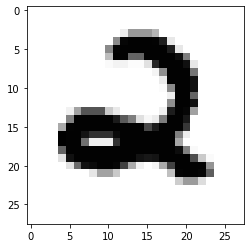

In [33]:
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, data_shape[0]*data_shape[1]).float().to(device)
    Y_test = mnist_test.test_labels.to(device) 

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    
    print(correct_prediction)
    print(correct_prediction.float())
    #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.

    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()


If *interpolation* is the default 'antialiased', then 'nearest'  
    interpolation is used if the image is upsampled by more than a  
    factor of three (i.e. the number of display pixels is at least  
    three times the size of the data array).  If the upsampling rate is  
    smaller than 3, or the image is downsampled, then 'hanning'  
    interpolation is used to act as an anti-aliasing filter, unless the  
    image happens to be upsampled by exactly a factor of two or one.  
